In [44]:
import sys
import os
import seaborn as sns
from dotenv import load_dotenv
import psycopg2
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Update the connection details with your own values
host = 'localhost'
port = '5432'
database = 'postgres'
user = 'postgres'
password = 'pass123'

# Establish a connection
#conn = psycopg2.connect(host=host, port=port, database=database, user=user, password=password)

In [3]:
def connect():
    conn = None
    try:
        print('Connecting..')
        conn = psycopg2.connect(
              host=host,
              database=database,
              user=user,
              password=password
        )
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        sys.exit(1)   
        
    print("All good, Connection successful!")
    return conn

In [4]:
def sql_to_dataframe(conn, query):
    """Import data from a PostgreSQL database using a SELECT query"""
    cursor = conn.cursor()   
    try:
        cursor.execute(query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    # The execute returns a list of tuples:   
    tuples_list = cursor.fetchall()   
    
    # Now we need to transform the list into a pandas DataFrame:   
    df = pd.DataFrame(tuples_list, columns=[col[0] for col in cursor.description])
    cursor.close()   
    return df

In [5]:
# create query
query = """ SELECT * FROM public.xdr_data  """

#opening the connection
conn = connect()

#loading our dataframe
df = sql_to_dataframe(conn, query)

#closing the connection
conn.close()

Connecting..
All good, Connection successful!


In [6]:
# Let’s see if we loaded the df successfully
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [7]:
# Aggregate per user
aggregated_data = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',
    'Dur. (ms).1': 'sum',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    
})

In [8]:
# Rename the columns
aggregated_data.columns = [
    'Number of xDR sessions',
    'Session duration',
    'Total DL data',
    'Total UL data',
    'Social Media DL',
    'Social Media UL',
    'Netflix DL',
    'Netflix UL',
    'Google DL',
    'Google UL',
    'Email DL',
    'Email UL',
    'Gaming DL',
    'Gaming UL',
    
]

In [9]:
# Display the aggregated data
aggregated_data

,Number of xDR sessions,Session duration,Total DL data,Total UL data,Social Media DL,Social Media UL,Netflix DL,Netflix UL,Google DL,Google UL,Email DL,Email UL,Gaming DL,Gaming UL
MSISDN/Number,,,,,,,,,,,,,,
3.360100e+10,1,116720140.0,8.426375e+08,36053108.0,2206504.0,25631.0,10265105.0,16915876.0,3337123.0,1051882.0,837400.0,493962.0,8.110911e+08,1367528.0
3.360100e+10,1,181230963.0,1.207552e+08,36104459.0,2598548.0,62017.0,770569.0,10451194.0,4197697.0,1137166.0,2828821.0,478960.0,1.050353e+08,14714780.0
3.360100e+10,1,134969374.0,5.566597e+08,39306820.0,3148004.0,47619.0,16525919.0,2827981.0,3343483.0,99643.0,2436500.0,768880.0,5.290685e+08,9759228.0
3.360101e+10,1,49878024.0,4.019932e+08,20327526.0,251469.0,28825.0,1157362.0,784730.0,5937765.0,3740728.0,2178618.0,106052.0,3.880748e+08,3051292.0
3.360101e+10,2,37104453.0,1.363130e+09,94280527.0,2861230.0,51312.0,24971647.0,24230077.0,13728668.0,4770948.0,2247808.0,1057661.0,1.308981e+09,5816727.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.379000e+10,1,8810688.0,6.879252e+08,26716429.0,234320.0,65863.0,14754741.0,147797.0,6834178.0,697091.0,480946.0,525969.0,6.573267e+08,3034642.0
3.379000e+10,1,140988659.0,4.445751e+08,35732243.0,442214.0,56355.0,6929961.0,1601099.0,1472406.0,3957299.0,2513433.0,664.0,4.276202e+08,9383076.0
3.197021e+12,1,877385325.0,1.948281e+08,37295915.0,668596.0,46628.0,10340908.0,16251392.0,8572779.0,1865881.0,842279.0,678492.0,1.645636e+08,13485133.0


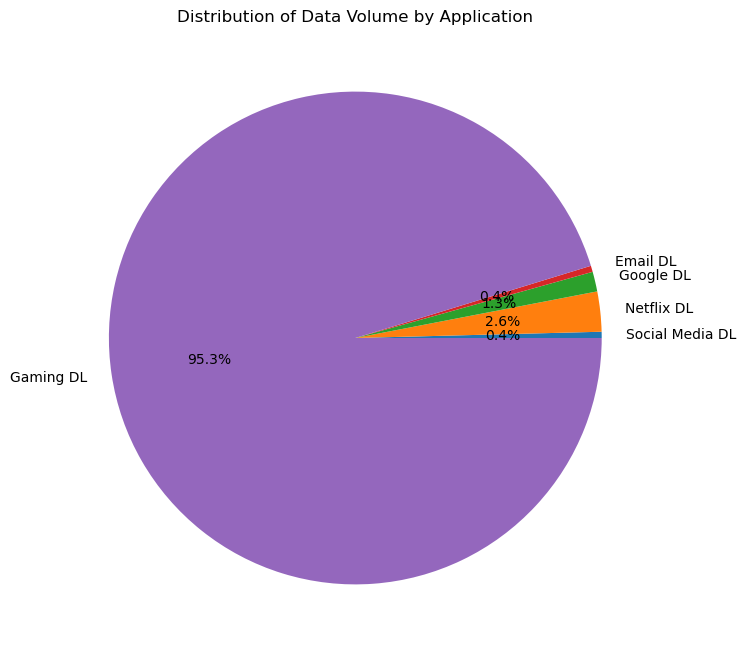

In [10]:
# Plot pie chart for data volume by application
app_data = aggregated_data[['Social Media DL', 'Netflix DL', 'Google DL', 'Email DL', 'Gaming DL']].sum()
plt.figure(figsize=(8, 8))
plt.pie(app_data, labels=app_data.index, autopct='%.1f%%')
plt.title('Distribution of Data Volume by Application')
plt.show()

In [11]:
# Calculate basic metrics
metrics = df.describe()

# Display the metrics
metrics

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [12]:
# Select quantitative variables
quantitative_vars = df.select_dtypes(include=['float64', 'int64'])

# Compute dispersion parameters
dispersion_parameters = quantitative_vars.agg(['count', 'mean', 'std', 'min', 'median', 'max'])
dispersion_parameters.loc['25%'] = quantitative_vars.quantile(0.25)
dispersion_parameters.loc['75%'] = quantitative_vars.quantile(0.75)

# Display the dispersion parameters
dispersion_parameters

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
median,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08


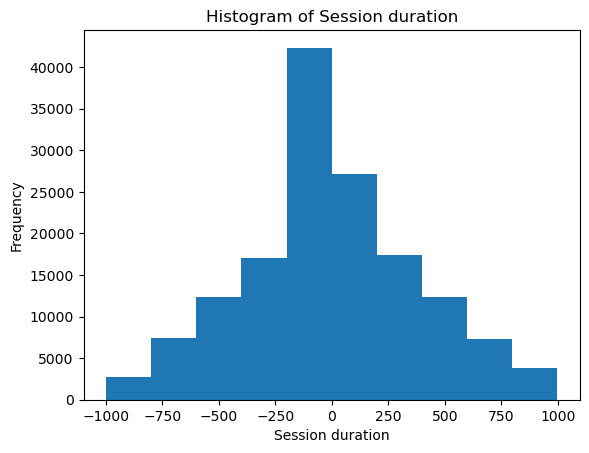

In [29]:
# Compute session duration in milliseconds
aggregated_data['Session duration'] #= aggregated_data['End ms'] - aggregated_data['Start ms']

# Identify variable types
continuous_vars = ['Session duration']
categorical_vars = ['Bearer Id']

# Plotting options for continuous variables
for var in continuous_vars:
    plt.figure()
    df[var].plot(kind='hist', bins=10)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {var}')
    plt.show()



In [38]:
# Calculate total duration for all sessions per user
aggregated_data['Total Session Duration'] = aggregated_data['Session duration'] * aggregated_data['Number of xDR sessions']

# Sort users based on total session duration
sorted_data = aggregated_data.sort_values(by='Total Session Duration', ascending=False)

# Segment users into decile classes
num_users = len(sorted_data)
decile_size = num_users // 10
sorted_data['Decile Class'] = pd.qcut(sorted_data['Total Session Duration'], 10, labels=False)

# Compute total data (DL+UL) per decile class
total_data_by_decile = sorted_data.groupby('Decile Class')[['Total DL data', 'Total UL data']].sum()

# Print the total data per decile class
print(total_data_by_decile)

              Total DL data  Total UL data
Decile Class                              
0              4.865641e+12   4.379521e+11
1              5.006742e+12   4.535331e+11
2              5.250866e+12   4.739585e+11
3              4.882960e+12   4.439342e+11
4              5.295671e+12   4.770686e+11
5              5.425025e+12   4.901451e+11
6              5.387688e+12   4.851838e+11
7              6.902806e+12   6.217070e+11
8              9.483829e+12   8.630397e+11
9              1.520836e+13   1.377334e+12


In [43]:
# Select the desired variables
variables = ['Number of xDR sessions', 'Session duration', 'Total DL data', 'Total UL data',
             'Social Media DL', 'Social Media UL', 'Netflix DL', 'Netflix UL',
             'Google DL', 'Google UL', 'Email DL', 'Email UL', 'Gaming DL', 'Gaming UL',
             'Total Session Duration']
selected_data = aggregated_data[variables]

# Compute the correlation matrix
correlation_matrix = selected_data.corr()

# Print the correlation matrix
print(correlation_matrix)

                        Number of xDR sessions  Session duration  \
Number of xDR sessions                1.000000          0.635724   
Session duration                      0.635724          1.000000   
Total DL data                         0.781291          0.500390   
Total UL data                         0.924573          0.589501   
Social Media DL                       0.760421          0.484588   
Social Media UL                       0.761783          0.486545   
Netflix DL                            0.762158          0.482519   
Netflix UL                            0.760037          0.479478   
Google DL                             0.764848          0.491099   
Google UL                             0.762804          0.482958   
Email DL                              0.760949          0.491176   
Email UL                              0.761770          0.485191   
Gaming DL                             0.758159          0.485580   
Gaming UL                             0.760615  

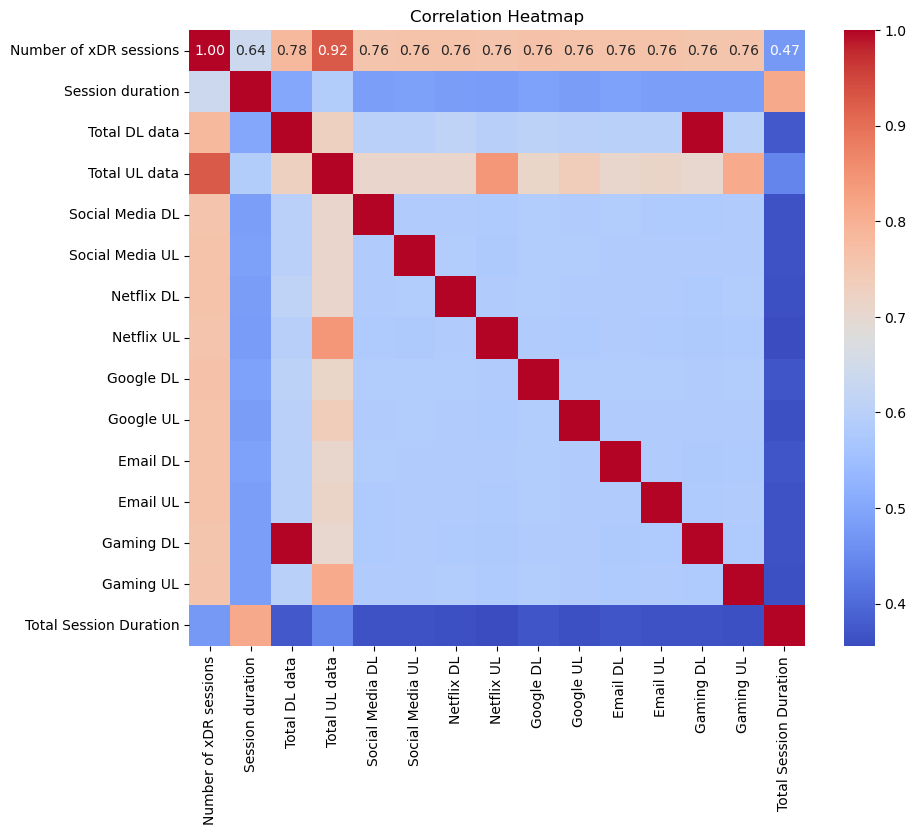

In [45]:
# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

In [46]:
from sklearn.decomposition import PCA
# Select the desired variables
variables = ['Number of xDR sessions', 'Session duration', 'Total DL data', 'Total UL data',
             'Social Media DL', 'Social Media UL', 'Netflix DL', 'Netflix UL',
             'Google DL', 'Google UL', 'Email DL', 'Email UL', 'Gaming DL', 'Gaming UL',
             'Total Session Duration']
selected_data = aggregated_data[variables]

# Perform PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(selected_data)

# Interpretation of results
explained_variance = pca.explained_variance_ratio_
interpretation = f"The first principal component explains {explained_variance[0]*100:.2f}% of the variance."
interpretation += f"\nThe second principal component explains {explained_variance[1]*100:.2f}% of the variance."
interpretation += "\n\nThis indicates that the two principal components capture a significant portion of the data's variability."

print(interpretation)

The first principal component explains 89.15% of the variance.
The second principal component explains 10.51% of the variance.

This indicates that the two principal components capture a significant portion of the data's variability.
